# <center>Homework Assignment 8: Clustering</center>
## <center>5th November 2024</center>
#### <center>Syed Asghar Abbas Zaidi 07201 in CS/CE 457/464-L1</center>
#### <center>sz07201@st.habib.edu.pk</center>

#### Importing Libraries 

In [306]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [308]:
baskin_df = pd.read_csv('baskin_robbins_icecream.csv')
baskin_df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category
0,Bananas Foster,160,8.0,0.2,20,16,2.0,std
1,Baseball Nut,160,9.0,0.2,19,13,3.0,std
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,std
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,std
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,light


## 1. Need to clean the data. Remove columns Flavour and Category for clustering purpose.

In [311]:
X = baskin_df.drop(['Category', 'Flavour'], axis=1)
# Rename columns to remove spaces for easier access
X = X.rename(columns={#
    "Total Fat (g)": "Total_Fat",
    "Trans Fat (g)": "Trans_Fat",
    "Carbohydrates (g)": "Carbohydrates",
    "Sugars (g)": "Sugars",
    "Protein (g)": "Protein"
})

X.head()


,Calories,Total_Fat,Trans_Fat,Carbohydrates,Sugars,Protein
0,160,8.0,0.2,20,16,2.0
1,160,9.0,0.2,19,13,3.0
2,170,9.0,0.3,21,15,3.0
3,120,4.0,0.1,17,16,3.0
4,130,2.0,0.1,26,20,2.0


### Interpretation 
In this code, I create a DataFrame named X by dropping the Category and Flavour columns from baskin_df to focus on the quantitative data. I then rename the columns to remove spaces, making them easier to access later (for example, changing Total Fat (g) to Total_Fat). Finally, I display the first few rows of X to verify the changes.

## 2. Scale (normalize) the data before clustering.

In [314]:
scaler = MinMaxScaler()
# transform data
XS = scaler.fit_transform(X)
# XS.head()
XS[1:5]

array([[0.34615385, 0.15      , 0.4       , 0.24      , 0.375     ,
        0.375     ],
       [0.38461538, 0.15      , 0.6       , 0.32      , 0.45833333,
        0.375     ],
       [0.19230769, 0.06666667, 0.2       , 0.16      , 0.5       ,
        0.375     ],
       [0.23076923, 0.03333333, 0.2       , 0.52      , 0.66666667,
        0.25      ]])

I start by creating a MinMaxScaler to normalize the data in my DataFrame X. 
This scaling brings all the feature values into a range between 0 and 1

After fitting the scaler to my data and transforming it, I save the scaled data in the variable XS. Finally, I take a look at the first four rows of XS to see how the values have changed after scaling.

In [315]:
# #might need to install pip install threadpoolctl==3.1.0
# #if you get error in the next step related to threadpoolctl
# import warnings
# warnings.filterwarnings('ignore')

## 3. Generate WSS (Knee Plot) to find optimal number of clusters. You can also plot Silhouette Coefficient plot to support your answer. 

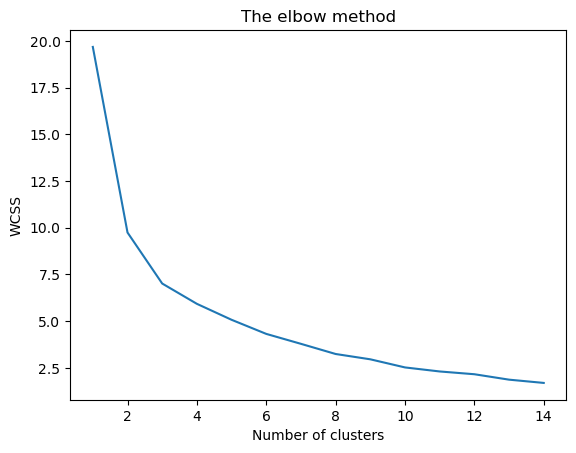

In [319]:
#Finding the optimum number of clusters for k-means clustering
wss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init=10, random_state = 99)
    kmeans.fit(XS)
    wss.append(kmeans.inertia_)
    
plt.plot(range(1, 15), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

#### Interpretation
I'm using this code to determine the optimal number of clusters for k-means clustering with the elbow method. I loop through cluster counts from 1 to 14, fitting a k-means model for each count and storing the inertia values in a list. Then, I plot the number of clusters against the within-cluster sum of squares (WCSS) to find the elbow point, which suggests the best number of clusters for my data.

I can pick a greater number of clusters for sure if I want greater WVCSS (Within-Cluster Sum of Squares), but as can be observed, it is after 3-clusters where the graph converges, thus I will be picking that. 
## 4. Perform K-Means clustering again with optimal number of clusters. 

In [321]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 99)
Y = kmeans.fit_predict(XS)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 0])

In [322]:
score = silhouette_score(XS, kmeans.labels_, metric='euclidean')
score

0.3583141783564117

After fitting the k-means model with three clusters, I assigned each data point to a cluster using the fit_predict method, resulting in an array of cluster labels. I then calculated the silhouette score to evaluate the clustering quality, measuring how similar a data point is to its own cluster compared to other clusters

### Interpretation
Just like Professor commented, having a score greater than 0.3 implies that the clustering that we are doing is pretty good. If it was less than 0.3 then it would have been concerning and I would have tried going for higher clusters.


## 5. Visualize the clustering results. 

#### Plotting any two features for visualization

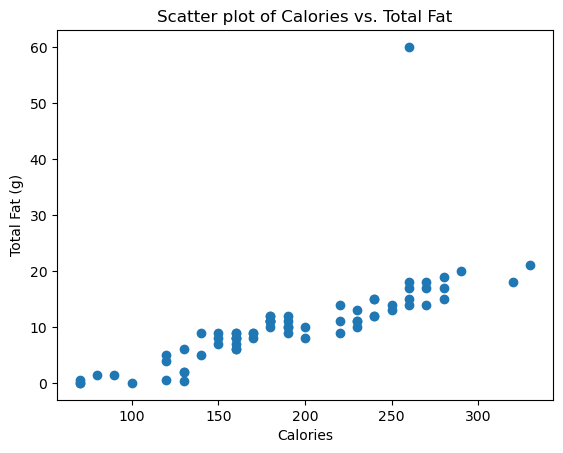

In [326]:
plt.scatter(x=X.Calories, y=X.Total_Fat)
plt.xlabel('Calories')
plt.ylabel('Total Fat (g)')
plt.title("Scatter plot of Calories vs. Total Fat")
plt.show()

In [327]:
# #After the clustering
# adding the colors
# Make sure that the kmeans has been fitted on the data before using kmeans.labels_
# You can use this method if you don't care about observing where the Clusters are forming at exactly !

# color2 = np.array(['green', 'red', 'blue'])
# plt.scatter(x=X.Calories, y=X.Total_Fat, c=color2[kmeans.labels_])
# plt.xlabel("Calories")
# plt.ylabel("Total Fat (g)")
# plt.title("Scatter plot of Calories vs. Total Fat post clustering")
# plt.show()

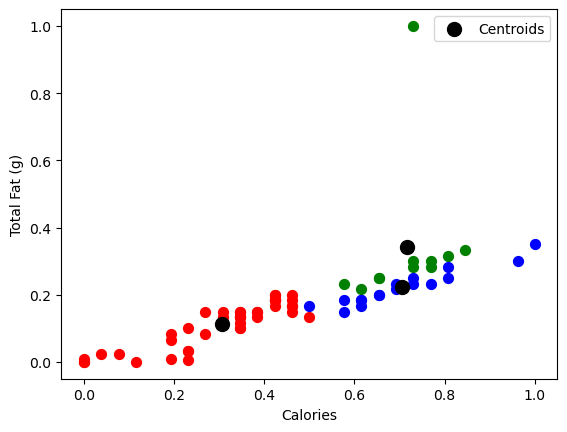

In [328]:
#Visualising the clusters
plt.scatter(XS[Y == 0, 0], XS[Y == 0, 1], s = 50, c = 'green')
plt.scatter(XS[Y == 1, 0], XS[Y == 1, 1], s = 50, c = 'red')
plt.scatter(XS[Y == 2, 0], XS[Y == 2, 1], s = 50, c = 'blue')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Calories')
plt.ylabel('Total Fat (g)')
plt.legend()

### Explaining how the Clusters were plotted
This code visualizes k-means clustering by plotting data points based on their cluster assignments and marking the centroids. 

It uses the dataset XS, where XS[:, 0] represents the x-axis (e.g., Calories) and XS[:, 1] the y-axis (e.g., Total Fat). 

The clustering labels in Y show each point's cluster, with points in cluster 0 shown in green, cluster 1 in red, and cluster 2 in blue. The centroids, indicated by larger black points, represent the average values of each cluster.

### Interpretation 
We can observe that outside of one outlier, the more fat you have in ur food, the more calories you are going to have as well. This is how the clusters have been formed as well accordingly, although I can't exactly tell why green and blue are formed the way they have been, perhap

### 7 and 8. Use cluster labels to create cluster specific data frames from original dataset. Can you suggest a unique name for each cluster? For example if a cluster is showing high Sugar level, then you can call it a “SugarLovers” cluster. 
#### More Analysis to find distinguishing and interesting features in each cluster. You can also use good visualizations to show differences


In [332]:
C1 = X.iloc[Y == 0, :]
C2 = X.iloc[Y == 1, :]
C3 = X.iloc[Y == 2, :]
C1.head()

,Calories,Total_Fat,Trans_Fat,Carbohydrates,Sugars,Protein
11,230,13.0,0.4,25,18,5.0
12,240,15.0,0.5,23,18,5.0
19,270,17.0,0.4,25,18,5.0
35,260,17.0,0.4,22,17,5.0
37,240,15.0,0.5,23,18,5.0


In [333]:
C1['Total_Fat'].mean()

20.545454545454547

<Axes: >

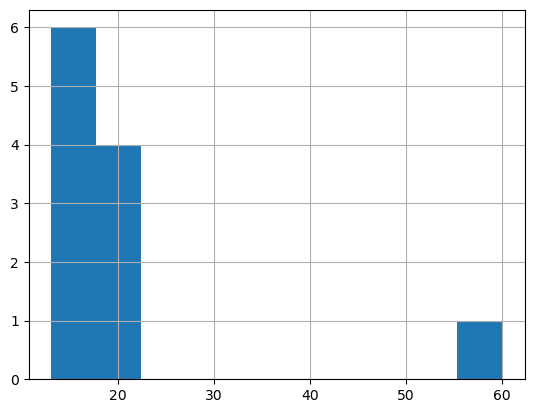

In [334]:
C1['Total_Fat'].hist()

In [335]:
C2['Total_Fat'].mean()

6.819047619047619

<Axes: >

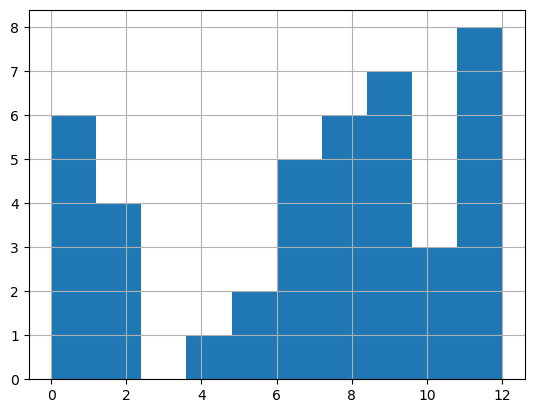

In [336]:
C2['Total_Fat'].hist()

In [337]:
C3['Total_Fat'].mean()

13.352941176470589

<Axes: >

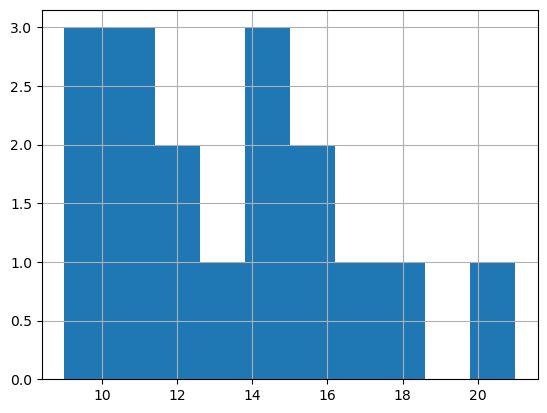

In [338]:
C3['Total_Fat'].hist()

In [339]:
C1.describe()

,Calories,Total_Fat,Trans_Fat,Carbohydrates,Sugars,Protein
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,256.363636,20.545455,0.436364,22.818182,17.090909,5.454545
std,21.574396,13.261702,0.050452,1.887760,1.044466,0.820200
min,220.000000,13.000000,0.400000,20.000000,15.000000,5.000000
25%,240.000000,15.000000,0.400000,21.500000,16.500000,5.000000
50%,260.000000,17.000000,0.400000,23.000000,17.000000,5.000000
75%,270.000000,18.500000,0.500000,24.500000,18.000000,5.500000
max,290.000000,60.000000,0.500000,25.000000,18.000000,7.000000


In [340]:
C2.describe()

,Calories,Total_Fat,Trans_Fat,Carbohydrates,Sugars,Protein
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,149.761905,6.819048,0.190476,20.238095,14.571429,2.635714
std,36.122292,3.889275,0.118547,4.600157,3.527888,1.347956
min,70.000000,0.000000,0.000000,13.000000,4.000000,0.000000
25%,130.000000,4.250000,0.100000,17.000000,13.000000,2.000000
50%,160.000000,8.000000,0.200000,20.000000,15.000000,3.000000
75%,180.000000,9.750000,0.300000,21.000000,17.000000,3.000000
max,200.000000,12.000000,0.400000,38.000000,20.000000,6.000000


In [341]:
C3.describe()

,Calories,Total_Fat,Trans_Fat,Carbohydrates,Sugars,Protein
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,253.529412,13.352941,0.388235,29.529412,22.588235,4.647059
std,34.630401,3.180825,0.060025,2.527787,2.450990,1.057188
min,200.000000,9.000000,0.200000,24.000000,19.000000,4.000000
25%,230.000000,11.000000,0.400000,29.000000,20.000000,4.000000
50%,250.000000,13.000000,0.400000,30.000000,23.000000,4.000000
75%,270.000000,15.000000,0.400000,30.000000,24.000000,5.000000
max,330.000000,21.000000,0.500000,36.000000,28.000000,8.000000


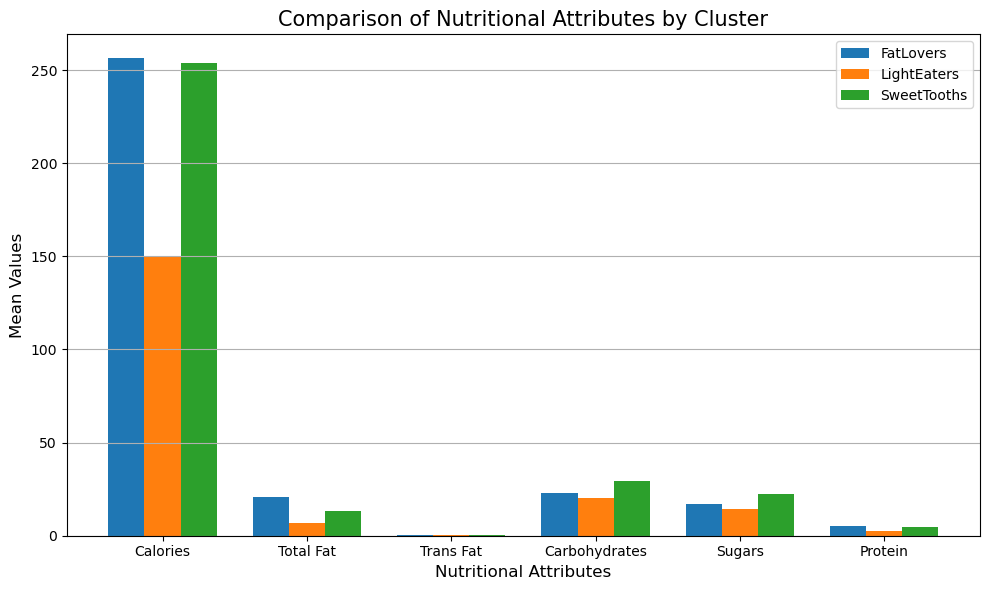

In [342]:
# Data for the clusters
clusters = ['FatLovers', 'LightEaters', 'SweetTooths']
mean_values = [
    [256.36, 20.55, 0.44, 22.82, 17.09, 5.45],  # Indulgent Delights
    [149.76, 6.82, 0.19, 20.24, 14.57, 2.64],   # Light Choices
    [253.53, 13.35, 0.39, 29.53, 22.59, 4.65]    # Carb Lovers
]

# Variables to plot
categories = ['Calories', 'Total Fat', 'Trans Fat', 'Carbohydrates', 'Sugars', 'Protein']
N = len(categories)

# Setting up the bar plot
bar_width = 0.25
index = np.arange(len(categories))

# Create the bar plots
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each cluster
for i in range(len(clusters)):
    ax.bar(index + i * bar_width, mean_values[i], bar_width, label=clusters[i])

# Adding labels and title
ax.set_xlabel('Nutritional Attributes', size=12)
ax.set_ylabel('Mean Values', size=12)
ax.set_title('Comparison of Nutritional Attributes by Cluster', size=15)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(categories)
ax.legend()

# Adding a grid for better readability
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

In [343]:
import pandas as pd

# Assuming C1, C2, and C3 are your DataFrames for each cluster
# Calculate means for each cluster and store in a list
clusters = [C1, C2, C3]
cluster_names = ['C1', 'C2', 'C3']
means_list = [cluster.mean() for cluster in clusters]

# Create a DataFrame from the means
means_df = pd.DataFrame(means_list, index=cluster_names).reset_index().rename(columns={'index': 'Cluster'})

# Display the resulting table
print(means_df)

  Cluster    Calories  Total_Fat  Trans_Fat  Carbohydrates     Sugars  \
0      C1  256.363636  20.545455   0.436364      22.818182  17.090909   
1      C2  149.761905   6.819048   0.190476      20.238095  14.571429   
2      C3  253.529412  13.352941   0.388235      29.529412  22.588235   

    Protein  
0  5.454545  
1  2.635714  
2  4.647059  


You can easily refer to the above table to compare means of various variables in different clusters with more convienence 

### Insights from Clustering Ice Cream Nutritional Information

**Cluster 1: High Calorie, High Fat Cluster ("IndulgentTreats")**
- **Calories and Fat**: This cluster has the highest average calorie (256.36) and fat content (20.55). These ice creams are likely the richest and creamiest options, perfect for indulgence.
- **Sugar Content**: The average sugar content (17.09) is also high, indicating these ice creams are quite sweet and likely to be preferred by those with a sweet tooth.
- **Protein**: Higher average protein (5.45) compared to Cluster 2, suggesting these ice creams not only taste rich but also provide a bit more nutritional value in terms of protein.

**Cluster 2: Low Calorie, Low Fat Cluster ("Guilt-Free Scoops")**
- **Calories and Fat**: The lowest average calorie (149.76) and fat content (6.82). These ice creams are lighter options, catering to those who are more health-conscious or looking for guilt-free treats.
- **Carbohydrates and Sugars**: Slightly lower average carbohydrates (20.24) and sugars (14.57), making them better choices for those monitoring their sugar intake.
- **Protein**: Lowest average protein (2.64), indicating these options might be less about protein and more about keeping the calorie count low.

**Cluster 3: High Sugar, Moderate Fat Cluster ("SugarRush")**
- **Sugar Content**: The highest average sugar content (22.59), indicating these ice creams are very sweet and likely to be popular among those who crave sugary treats.
- **Calories and Carbohydrates**: The average calorie (253.53) and carbohydrate content (29.53) are high, supporting the sweet nature of these ice creams.
- **Fat and Protein**: Moderate fat (13.35) and protein (4.65) levels, suggesting that these ice creams strike a balance between sweetness and richness.

### Suggested Names for Clusters
1. **IndulgentTreats**: Rich, creamy, high-calorie, and high-fat ice creams for those special moments of indulgence.
2. **Guilt-Free Scoops**: Low-calorie, low-fat ice creams ideal for health-conscious consumers looking for lighter desserts.
3. **SweetCravings**: High-sugar, moderately fatty ice creams perfect for satisfying a strong sweet tooth while still providing a creamy texture.


# Thank you!

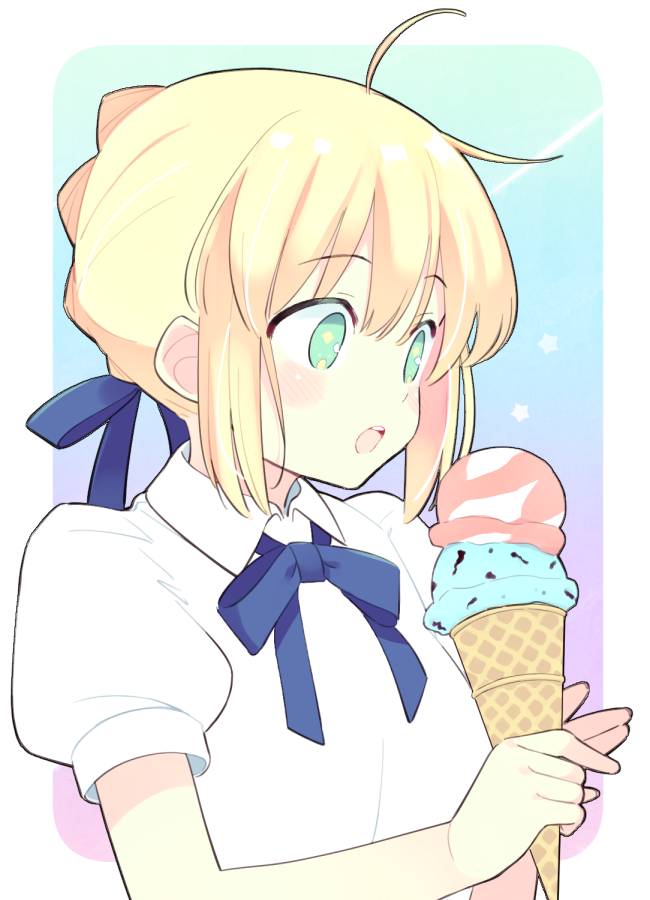

In [347]:
from IPython.display import Image, display

# Load and display image
image_path = 'SABER_ICECREAM.png' 
display(Image(filename=image_path,width=300))

Above Saber fan-art credit: https://www.pixiv.net/en/artworks/105381525Above Saber fan-art credit: https://www.pixiv.net/en/artworks/105381525